In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


## Import Training Output DF and Inspect

In [8]:
TrainOut = pd.read_csv('Churn_training_output.csv')
TrainOut.head()

,contract_id,has_churned_over_next_3m
0,6975aab29f35173b43eae4f595b747c7,0
1,8073016b742f47cf4c76cc41dc410122,1
2,227c0e6b15256a1d3d3460e15c24ba60,0
3,e1ea0597bbad7bfd95adf1c7103bfda1,0
4,a2e017f297f2557a7b1cf4a92bc993e9,0


In [9]:
#Giving a shorter name to second column
TrainOut.rename(columns = {'has_churned_over_next_3m':'Churning'}, inplace = True)
TrainOut.head()

,contract_id,Churning
0,6975aab29f35173b43eae4f595b747c7,0
1,8073016b742f47cf4c76cc41dc410122,1
2,227c0e6b15256a1d3d3460e15c24ba60,0
3,e1ea0597bbad7bfd95adf1c7103bfda1,0
4,a2e017f297f2557a7b1cf4a92bc993e9,0


In [10]:
#Changing datatype to float
TrainOut['Churning']=TrainOut['Churning'].astype(float)
TrainOut.dtypes

contract_id     object
Churning       float64
dtype: object

In [11]:
TrainOut.shape

(16096, 2)

In [12]:
#Check for null values
len(TrainOut[TrainOut.isnull().T.any()])

0

In [13]:
#Checking Churning column consistency
len(TrainOut[(TrainOut['Churning']!=0)&(TrainOut['Churning']!=1)])

0

In [14]:
#Check ratio between Churn and No_Churn
print('Number of customers who churned', len(TrainOut[(TrainOut['Churning']==1)]))
print('Number of customers who did not churn', len(TrainOut[(TrainOut['Churning']==0)]))

Number of customers who churned 1595
Number of customers who did not churn 14501


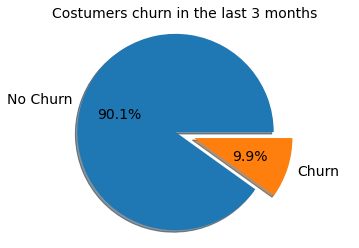

In [15]:
#PIE CHART TO SHOW CHURN AND NO CHURN PERCENTAGES
TrainOut1 = TrainOut.groupby(['Churning']).count().contract_id.values.tolist()
labels = ['No Churn', 'Churn']

fig1, ax1 = plt.subplots()
explode_val = (0, 0.2)
ax1.pie(TrainOut1, explode = explode_val, labels=labels, shadow=True, autopct='%1.1f%%',textprops={'fontsize': 14})
ax1.axis('equal');
ax1.set_title('Costumers churn in the last 3 months',fontsize=14);

## Import Training Historical DF and Inspect

In [16]:
TrainHist = pd.read_csv('Churn_training_hist_data.csv')
TrainHist.head(2)

,contract_id,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
0,cd7ad4a23c39fd588bf326333786300c,2015-02-01,0.136157,0.0,0.0,39.926856,0.0,0.0
1,73c63df734c0948948b61dcab3153dce,2015-06-01,0.134560,0.0,0.0,39.926855,0.0,0.0


In [17]:
TrainHist.shape

(193002, 8)

In [18]:
#Check how many rows have at least one NaN value
len(TrainHist[TrainHist.isnull().T.any()])

1359

In [19]:
#Replacing NaN with zeros for later purposes
TrainHist = TrainHist.fillna(0)
len(TrainHist[TrainHist.isnull().T.any()])

0

In [20]:
TrainHist.dtypes

contract_id                 object
reference_date              object
price_energy_1st_period    float64
price_energy_2nd_period    float64
price_energy_3rd_period    float64
price_power_1st_period     float64
price_power_2nd_period     float64
price_power_3rd_period     float64
dtype: object

### Correlation between Churning and average energy and power prices

In [21]:
#SUMMING THE HISTORIC DATAFRAME TO FIND THE ENERGY AND POWER PRICES IN THE WHOLE YEAR 2015 AND JOINING THE HISTORIC AND CHURNING DATAFRAMES
TrainHistSum= TrainHist.groupby('contract_id').sum() #Now it has the same length as the churning dataframe
THO_join = TrainOut.merge(TrainHistSum,how='inner',left_on='contract_id',right_on='contract_id')
THO_join.head(3)

,contract_id,Churning,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
0,6975aab29f35173b43eae4f595b747c7,0.0,1.328094,0.968983,1.104592,439.652769,221.001172,147.798618
1,8073016b742f47cf4c76cc41dc410122,1.0,1.619746,0.000000,0.000000,479.603318,0.000000,0.000000
2,227c0e6b15256a1d3d3460e15c24ba60,0.0,1.630576,1.187414,1.345940,442.209209,223.339939,150.243545


In [22]:
len(THO_join)

16096

In [23]:
# CREATE 2 NEW COLUMNS WITH THE AVERAGES OF THE 3 PERIODS ENERGY AND POWER PRICES PER EACH CONTRACT
THO_join['AVG_price_energy']=THO_join.iloc[:,[2,3,4]].mean(axis=1)
THO_join['AVG_price_power']=THO_join.iloc[:,[5,6,7]].mean(axis=1)
THO_join.head(2)

,contract_id,Churning,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period,AVG_price_energy,AVG_price_power
0,6975aab29f35173b43eae4f595b747c7,0.0,1.328094,0.968983,1.104592,439.652769,221.001172,147.798618,1.133890,269.484186
1,8073016b742f47cf4c76cc41dc410122,1.0,1.619746,0.000000,0.000000,479.603318,0.000000,0.000000,0.539915,159.867773


In [24]:
# CREATE 2 SUB-DATAFRAMES TO SEPARATE CHURN AND NO-CHURN CASES
THO_join_Churn = THO_join[THO_join['Churning']==1]
THO_join_NoChurn = THO_join[THO_join['Churning']==0]
len(THO_join[(THO_join['Churning']!=1)&(THO_join['Churning']!=0)]) #check consistency again

0

In [25]:
#Check again ratio between Churn and No_Churn
print('Number of Customers who churned', len(THO_join_Churn))
print('Number of Customers who did not churn', len(THO_join_NoChurn))

Number of Customers who churned 1595
Number of Customers who did not churn 14501


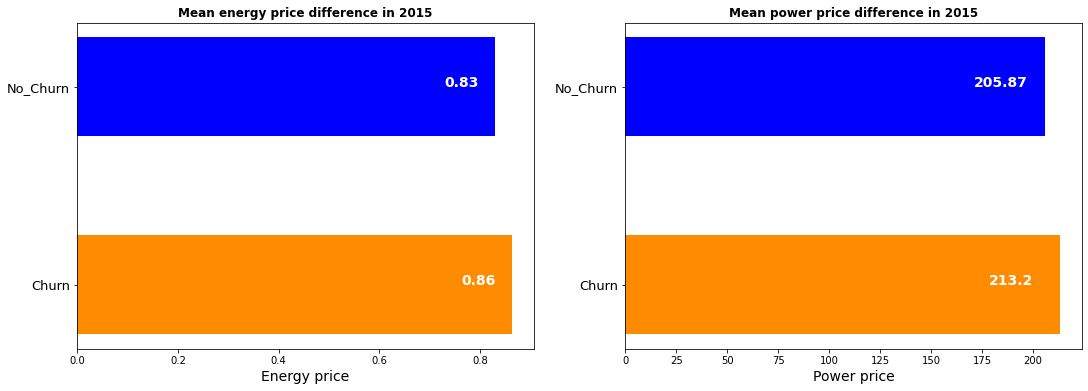

In [26]:
# CALCULATE THE MEAN ENERGY AND POWER PRICES FROM THE AVG COLUMNS, AND PLOT 
Mean_price_energy_Churn = THO_join_Churn['AVG_price_energy'].mean()
Mean_price_power_Churn = THO_join_Churn['AVG_price_power'].mean()

Mean_price_energy_NoChurn = THO_join_NoChurn['AVG_price_energy'].mean()
Mean_price_power_NoChurn = THO_join_NoChurn['AVG_price_power'].mean()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))
plt.subplots_adjust(wspace=0.2)

a = ['Churn', 'No_Churn']
b = [Mean_price_energy_Churn, Mean_price_energy_NoChurn]
c = [Mean_price_power_Churn, Mean_price_power_NoChurn]
width = 0.5
ax1.barh(a, b, width, color=["darkorange","blue"])
ax2.barh(a, c, width, color=["darkorange","blue"])
ax1.set_xlabel('Energy price',fontsize=14)
ax1.set_yticklabels(a,fontsize=13)
ax2.set_xlabel('Power price',fontsize=14)
ax2.set_yticklabels(a,fontsize=13)
ax1.set_title('Mean energy price difference in 2015',fontweight='bold')
ax2.set_title('Mean power price difference in 2015',fontweight='bold')
for i, v in enumerate(b):
    ax1.text(v-.1, i, str(round(v,2)), color='white', fontweight='bold',fontsize=14)
for i, v in enumerate(c):
    ax2.text(v-35, i, str(round(v,2)), color='white', fontweight='bold',fontsize=14);

## Import Training DF and Inspect

In [27]:
Training = pd.read_csv('Churn_training_data.csv')
Training.tail(5)

,contract_id,company_category,campaing_code_elect,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_fist_act_date,...,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power
16091,b4c9d3087133ee1619884ea047b57fe5,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,729575,0,33991,2013-01-31,2016-05-14,NaN,...,27.257522,f,884.608104,-10.167780,-9.193837,1,-1954.997357,3,lxidpiddsbxsbosboudacockeimpuepw,128.945761
16092,d997a45fc29f1c98891bcce4e25ba400,pmedwkpuckbppeoecxiccwxluwkxdkpe,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6061,0,699,2011-08-09,2016-09-05,NaN,...,27.257522,f,63.572701,132.460985,119.772928,1,27.077663,4,lxidpiddsbxsbosboudacockeimpuepw,118.930556
16093,1f8e97229ae68386239e314c54e687e4,duukumowsmmdaaadwsdwwieefdmiebpm,NaN,foosdfpfkusacimwkcsosbicdxkicaua,17013,0,1107,2013-05-07,2016-05-07,NaN,...,29.744311,f,148.333993,35.680512,32.262778,1,81.099211,3,lxidpiddsbxsbosboudacockeimpuepw,17.351342
16094,b8b7039f339d0909d1216f4a9a07dd1c,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,46471,0,1949,2009-10-13,2016-10-13,2009-10-13,...,30.748175,f,0.000000,35.820435,32.389299,1,33.969709,6,lxidpiddsbxsbosboudacockeimpuepw,16.525088
16095,5844cbd329236f04d75b25d68a7ab279,uiouuawillpcssldoeemcddcpfseebsw,NaN,foosdfpfkusacimwkcsosbicdxkicaua,119112,0,2311,2012-10-24,2016-10-22,2012-10-24,...,27.257522,f,217.316399,18.221159,16.475807,1,217.349651,3,lxidpiddsbxsbosboudacockeimpuepw,43.816521


In [28]:
#Dropping empty and superflous columns
Training = Training.drop(columns=['company_category','campaing_code_elect','channel','contract_fist_act_date'])

In [29]:
#Converting all numerical data into float
Training[['elect_cons_at_12m','gas_cons_at_12m','elect_cons_last_month','number_active_products',
          'customer_antiquity_in_years']] = Training[['elect_cons_at_12m','gas_cons_at_12m','elect_cons_last_month',
                                                      'number_active_products','customer_antiquity_in_years']].astype(float)

In [30]:
Training.dtypes

contract_id                             object
elect_cons_at_12m                      float64
gas_cons_at_12m                        float64
elect_cons_last_month                  float64
contract_activation_date                object
contract_end_date                       object
contract_last_mod_date                  object
contract_renewal_date                   object
fcst_bill_baseline_elect_next_month    float64
fcst_bill_baseline_elect_cal_year      float64
fcst_bill_baseline_elect_12m           float64
fcst_consumption_elect_next_month      float64
fcst_consumption_elect_12m             float64
fcst_consumption_elect_cal_year        float64
fcst_current_discount                  float64
fcst_bill_meter_rent_12m               float64
fcst_price_period_1                    float64
fcst_price_period_2                    float64
fcst_price_power_period_1              float64
client_got_gas                          object
current_paid_consumption               float64
gross_margin_

### Correlation between Churning and  gas service

In [31]:
#JOINING THE TRAINING AND THE CHURNING DATAFRAMES
TO_join = TrainOut.merge(Training,how='inner',left_on='contract_id',right_on='contract_id')
TO_join.head()

,contract_id,Churning,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,...,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power
0,6975aab29f35173b43eae4f595b747c7,0.0,12067.0,8723.0,303.0,2009-08-21,2016-08-21,2015-07-10,2015-08-22,NaN,...,27.257522,t,27.027749,30.223492,27.328471,3.0,37.220019,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,21.595285
1,8073016b742f47cf4c76cc41dc410122,1.0,3183.0,0.0,406.0,2011-12-19,2016-12-19,2015-11-01,2015-12-21,NaN,...,31.082797,f,54.699675,38.276871,34.610440,1.0,17.946074,4.0,lxidpiddsbxsbosboudacockeimpuepw,15.648757
2,227c0e6b15256a1d3d3460e15c24ba60,0.0,18464.0,26847.0,1534.0,2010-01-20,2016-06-04,2015-06-04,2015-01-22,NaN,...,27.592143,t,190.565716,73.755271,66.690466,3.0,57.147990,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,21.595285
3,e1ea0597bbad7bfd95adf1c7103bfda1,0.0,17743.0,0.0,0.0,2012-03-12,2016-03-12,2012-03-12,2015-03-13,NaN,...,29.744311,f,0.000000,42.023714,37.998383,1.0,105.174300,4.0,lxidpiddsbxsbosboudacockeimpuepw,16.462493
4,a2e017f297f2557a7b1cf4a92bc993e9,0.0,42537.0,7606.0,3873.0,2012-07-12,2016-09-20,2013-09-20,2015-09-25,NaN,...,27.257522,t,344.787353,24.346702,22.014602,2.0,185.465888,4.0,lxidpiddsbxsbosboudacockeimpuepw,31.418949


In [32]:
len(TO_join['Churning']) #Check

16096

In [33]:
#Check consistency of 'client_got_gas' column
len(TO_join[(TO_join['client_got_gas']!='f')&(TO_join['client_got_gas']!='t')])

0

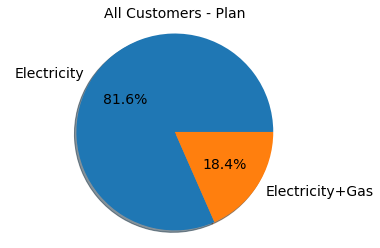

In [34]:
#CHECK THE PERCENTAGES OF TOTAL NUMBER OF CUSTOMERS WITH AND WITHOUT GAS
TO_joinGAS = TO_join.groupby(['client_got_gas']).count().contract_id.values.tolist()
labels = ['Electricity','Electricity+Gas']

fig1, ax1 = plt.subplots()
explode_val = (0, 0)
ax1.pie(TO_joinGAS, explode = explode_val, labels=labels, shadow=True, autopct='%1.1f%%',textprops={'fontsize': 14})
ax1.axis('equal');
ax1.set_title('All Customers - Plan',fontsize=14);

In [35]:
#Check percentages of Churned and Non-Churned customers that have gas
GAS=TO_join[TO_join['client_got_gas']=='t']
ChurnWithGas = GAS[GAS['Churning']==1]
NoChurnWithGas = GAS[GAS['Churning']==0]
print(100*len(ChurnWithGas)/len(GAS))
print(100*len(NoChurnWithGas)/len(GAS))

7.894736842105263
92.10526315789474


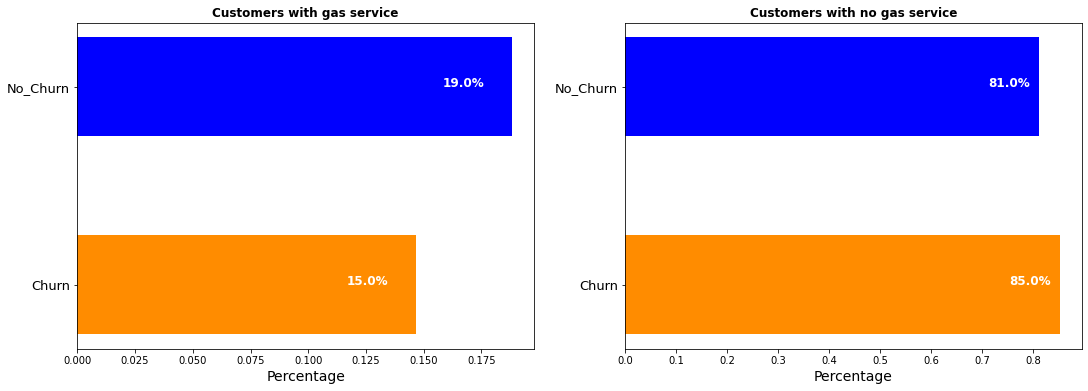

In [36]:
# CREATE 2 SUB-DATAFRAMES TO SEPARATE CHURN AND NO-CHURN CASES
TO_join_Churn = TO_join[(TO_join['Churning']==1)]
TO_join_NoChurn = TO_join[(TO_join['Churning']==0)]

#CALCULATE PERCENTAGE OF CHURNED AND NON-CHURNED CUSTOMERS HAVING AND NOT HAVING GAS SERVICE
TO_join_ChurnGAS = len(TO_join_Churn[TO_join_Churn['client_got_gas']=='t'])/len(TO_join_Churn['client_got_gas'])
TO_join_ChurnNoGAS = len(TO_join_Churn[TO_join_Churn['client_got_gas']=='f'])/len(TO_join_Churn['client_got_gas'])
TO_join_NoChurnGAS = len(TO_join_NoChurn[TO_join_NoChurn['client_got_gas']=='t'])/len(TO_join_NoChurn['client_got_gas'])
TO_join_NoChurnNoGAS = len(TO_join_NoChurn[TO_join_NoChurn['client_got_gas']=='f'])/len(TO_join_NoChurn['client_got_gas'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))
plt.subplots_adjust(wspace=0.2)
a = ['Churn', 'No_Churn']
b = [TO_join_ChurnGAS, TO_join_NoChurnGAS]
c = [TO_join_ChurnNoGAS, TO_join_NoChurnNoGAS]
ax1.barh(a, b, width, color=["darkorange","blue"])
ax2.barh(a, c, width, color=["darkorange","blue"])
ax1.set_xlabel('Percentage',fontsize=14)
ax1.set_yticklabels(a,fontsize=13)
ax2.set_xlabel('Percentage',fontsize=14)
ax2.set_yticklabels(a,fontsize=13)
ax1.set_title('Customers with gas service',fontweight='bold')
ax2.set_title('Customers with no gas service',fontweight='bold')
for i, v in enumerate(b):
    ax1.text(v-0.03, i, str(round(v*100,0))+'%', color='white', fontweight='bold',fontsize=12)
for i, v in enumerate(c):
    ax2.text(v-0.1, i, str(round(v*100,0))+'%', color='white', fontweight='bold',fontsize=12)

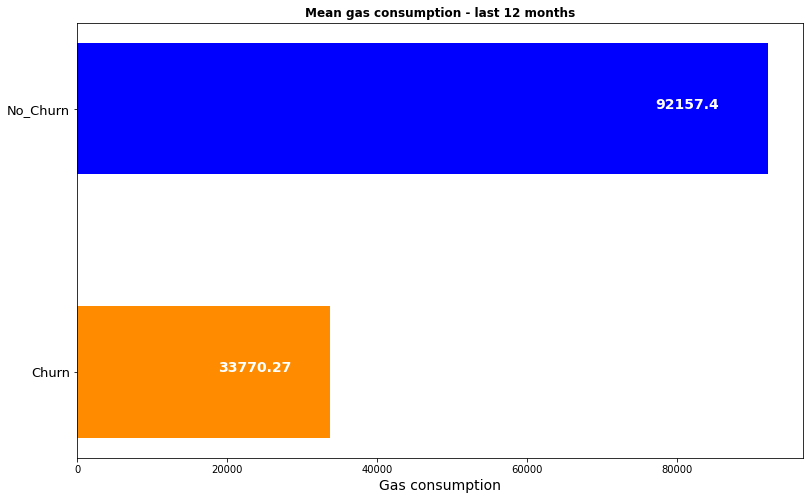

In [37]:
# CREATE 2 SUB-DATAFRAMES TO SEPARATE CHURN AND NO-CHURN CASES FOR ALL CUSTOMERS THAT USED GAS
TO_join_Churn = TO_join[(TO_join['Churning']==1) & (TO_join['client_got_gas']=='t')]
TO_join_NoChurn = TO_join[(TO_join['Churning']==0) & (TO_join['client_got_gas']=='t')]

#CALCULATE THE MEAN GAS CONSUMPTION FOR THE 2 GROUPS, AND PLOT
Mean_gas_cons12m_Churn = TO_join_Churn['gas_cons_at_12m'].mean()
Mean_gas_cons12m_NoChurn = TO_join_NoChurn['gas_cons_at_12m'].mean()

fig = plt.figure(figsize=(13, 8)) 
a = ['Churn', 'No_Churn']
b = [Mean_gas_cons12m_Churn, Mean_gas_cons12m_NoChurn]
plt.barh(a, b, width, color=["darkorange","blue"])
plt.xlabel('Gas consumption',fontsize=14)
plt.yticks(a,fontsize=13)
plt.title('Mean gas consumption - last 12 months',fontweight='bold')
for i, v in enumerate(b):
    plt.text(v-15000, i, str(round(v,2)), color='white', fontweight='bold',fontsize=14)

### Correlation between Churning and mean electricity consumption

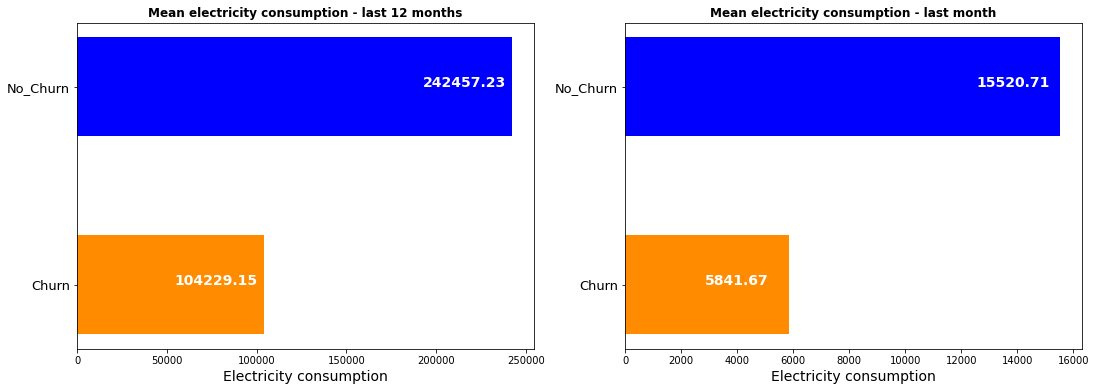

In [38]:
# CREATE AGAIN 2 SUB-DATAFRAMES TO SEPARATE CHURN AND NO-CHURN CASES
TO_join_Churn = TO_join[(TO_join['Churning']==1)]
TO_join_NoChurn = TO_join[(TO_join['Churning']==0)]

#CALCULATE THE MEAN ENERGY CONSUMPTION (12 MONTHS AND 1 MONTH) FOR THE 2 GROUPS, AND PLOT
Mean_elect_cons12m_Churn = TO_join_Churn['elect_cons_at_12m'].mean()
Mean_elect_cons1m_Churn = TO_join_Churn['elect_cons_last_month'].mean()

Mean_elect_cons12m_NoChurn = TO_join_NoChurn['elect_cons_at_12m'].mean()
Mean_elect_cons1m_NoChurn = TO_join_NoChurn['elect_cons_last_month'].mean()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))
plt.subplots_adjust(wspace=0.2)

a = ['Churn', 'No_Churn']
b = [Mean_elect_cons12m_Churn, Mean_elect_cons12m_NoChurn]
c = [Mean_elect_cons1m_Churn, Mean_elect_cons1m_NoChurn]
width = 0.5
ax1.barh(a, b, width, color=["darkorange","blue"])
ax2.barh(a, c, width, color=["darkorange","blue"])
ax1.set_xlabel('Electricity consumption',fontsize=14)
ax1.set_yticklabels(a,fontsize=13)
ax2.set_xlabel('Electricity consumption',fontsize=14)
ax2.set_yticklabels(a,fontsize=13)
ax1.set_title('Mean electricity consumption - last 12 months',fontweight='bold')
ax2.set_title('Mean electricity consumption - last month',fontweight='bold')
for i, v in enumerate(b):
    ax1.text(v-50000, i, str(round(v,2)), color='white', fontweight='bold',fontsize=14)
for i, v in enumerate(c):
    ax2.text(v-3000, i, str(round(v,2)), color='white', fontweight='bold',fontsize=14);

### Correlation between Churning and number of active products

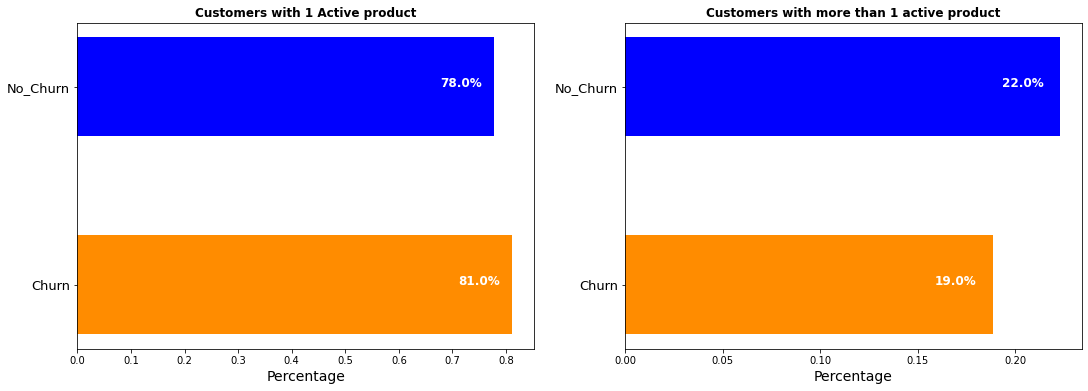

In [39]:
#CALCULATE PERCENTAGE OF CHURNED AND NON-CHURNED CUSTOMERS HAVING ONE ACTIVE PRODUCT, AND MORE THAN ONE ACTIVE PRODUCT
TO_join_NoChurn1more = len(TO_join_NoChurn[TO_join_NoChurn['number_active_products']>1])/len(TO_join_NoChurn['number_active_products'])
TO_join_NoChurn1 = len(TO_join_NoChurn[TO_join_NoChurn['number_active_products']==1])/len(TO_join_NoChurn['number_active_products'])

TO_join_Churn1more = len(TO_join_Churn[TO_join_Churn['number_active_products']>1])/len(TO_join_Churn['number_active_products'])
TO_join_Churn1 = len(TO_join_Churn[TO_join_Churn['number_active_products']==1])/len(TO_join_Churn['number_active_products'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))
plt.subplots_adjust(wspace=0.2)
a = ['Churn', 'No_Churn']
b = [TO_join_Churn1, TO_join_NoChurn1]
c = [TO_join_Churn1more, TO_join_NoChurn1more]
ax1.barh(a, b, width, color=["darkorange","blue"])
ax2.barh(a, c, width, color=["darkorange","blue"])
ax1.set_xlabel('Percentage',fontsize=14)
ax1.set_yticklabels(a,fontsize=13)
ax2.set_xlabel('Percentage',fontsize=14)
ax2.set_yticklabels(a,fontsize=13)
ax1.set_title('Customers with 1 Active product',fontweight='bold')
ax2.set_title('Customers with more than 1 active product',fontweight='bold')
for i, v in enumerate(b):
    ax1.text(v-0.1, i, str(round(v*100,0))+'%', color='white', fontweight='bold',fontsize=12)
for i, v in enumerate(c):
    ax2.text(v-0.03, i, str(round(v*100,0))+'%', color='white', fontweight='bold',fontsize=12)

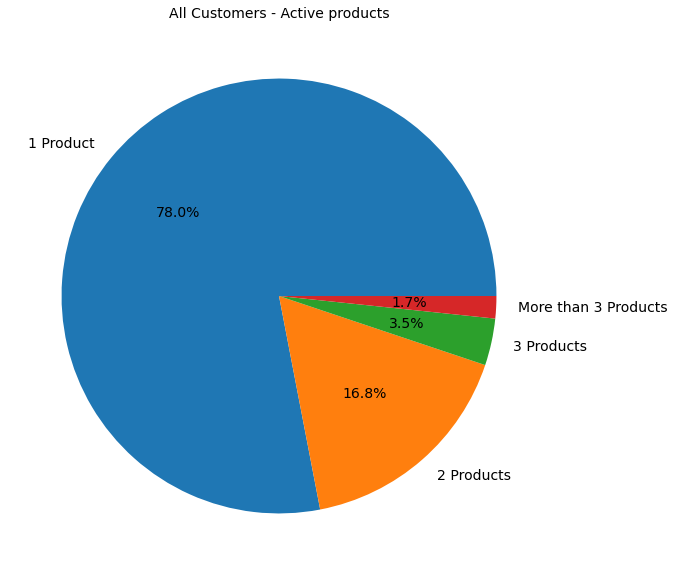

In [40]:
#CHECK THE PERCENTAGES OF TOTAL NUMBER OF CUSTOMERS WITH 1, 2, 3 OR MORE PRODUCTS
Prod1 = len(TO_join[TO_join['number_active_products']==1])
Prod2 = len(TO_join[TO_join['number_active_products']==2])
Prod3 = len(TO_join[TO_join['number_active_products']==3])
ProdMore = len(TO_join[TO_join['number_active_products']>3])
fig = plt.figure(figsize=(10, 10))
labels = ['1 Product', '2 Products', '3 Products', 'More than 3 Products']
sizes=[Prod1,Prod2,Prod3,ProdMore]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',textprops={'fontsize': 14});
plt.title('All Customers - Active products',fontsize=14);

### Correlation between Churning and number of years with the company

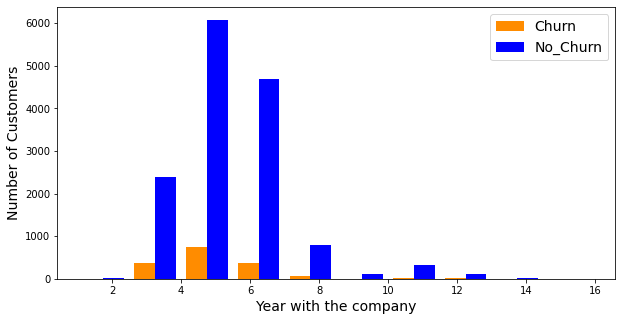

In [41]:
#SHOW THE DISTRIBUTION OF CHURNED AND NON-CHURNED CUSTOMERS AS A FUNCTION OF THE NUMBER OF YEARS WITH THE COMPANY
fig = plt.figure(figsize=(10,5))
plt.hist([TO_join_Churn.customer_antiquity_in_years,TO_join_NoChurn.customer_antiquity_in_years],color=['darkorange','blue'],
        label=['Churn','No_Churn'])
plt.legend(fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.xlabel('Year with the company',fontsize=14);

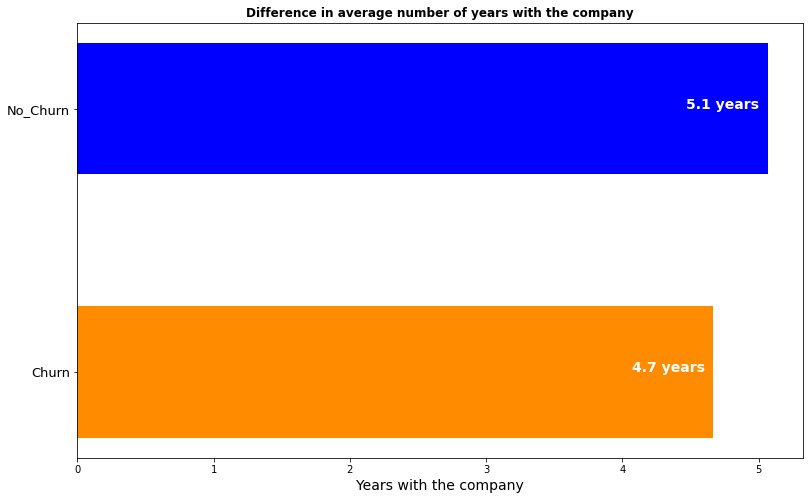

In [42]:
#CALCULATE THE MEAN NUMBER OF YEARS AS CUSTOMERS FOR THE 2 GROUPS, AND PLOT
Years_Churn = TO_join_Churn['customer_antiquity_in_years'].mean()
Years_NoChurn = TO_join_NoChurn['customer_antiquity_in_years'].mean()

fig = plt.figure(figsize=(13, 8)) 
a = ['Churn', 'No_Churn']
b = [Years_Churn, Years_NoChurn]
plt.barh(a, b, width, color=["darkorange","blue"])
plt.xlabel('Years with the company',fontsize=14)
plt.yticks(a,fontsize=13)
plt.title('Difference in average number of years with the company',fontweight='bold')
for i, v in enumerate(b):
    plt.text(v-0.6, i, str(round(v,1))+' years', color='white', fontweight='bold',fontsize=14)

In [43]:
#CONVERT CONTRACT LAST MODIFICATION DATE TO DATETIME FORMAT FOR THE 2 GROUPS
TO_join_Churn['contract_last_mod_date']=TO_join_Churn['contract_last_mod_date'].astype('datetime64[ns]')
TO_join_NoChurn['contract_last_mod_date']=TO_join_NoChurn['contract_last_mod_date'].astype('datetime64[ns]')

Text(0.5, 0, 'Contract last modification year')

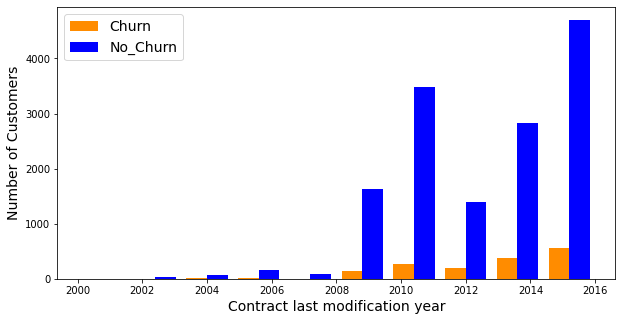

In [44]:
#SHOW THE DISTRIBUTION OF THE 2 GROUPS AS A FUNCTION OF THE CONTRACT LAST MODIFICATION YEAR
Modyear_Churn = TO_join_Churn['contract_last_mod_date'].apply(lambda x: x.year)
Modyear_NoChurn = TO_join_NoChurn['contract_last_mod_date'].apply(lambda x: x.year)

fig = plt.figure(figsize=(10,5))
plt.hist([Modyear_Churn,Modyear_NoChurn],color=['darkorange','blue'],label=['Churn','No_Churn'])
plt.legend(fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.xlabel('Contract last modification year',fontsize=14)

### Correlation between Churning and paid vs not_paid consumption

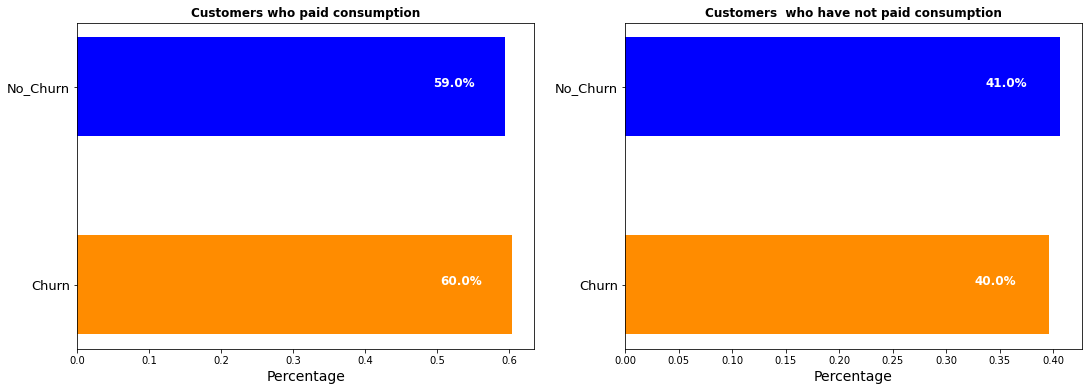

In [45]:
#CALCULATE PERCENTAGES OF CHURNED AND NOT CHURNED CUSTOMERS THAT DID AND DID NOT PAY FOR CONSUMPTION, AND PLOT
Churned_paid = len(TO_join_Churn[TO_join_Churn['current_paid_consumption']!=0])/len(TO_join_Churn)
NoChurned_paid = len(TO_join_NoChurn[TO_join_NoChurn['current_paid_consumption']!=0])/len(TO_join_NoChurn)

Churned_Unpaid = len(TO_join_Churn[TO_join_Churn['current_paid_consumption']==0])/len(TO_join_Churn)
NoChurned_Unpaid = len(TO_join_NoChurn[TO_join_NoChurn['current_paid_consumption']==0])/len(TO_join_NoChurn)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))
plt.subplots_adjust(wspace=0.2)
a = ['Churn', 'No_Churn']
b = [Churned_paid, NoChurned_paid]
c = [Churned_Unpaid, NoChurned_Unpaid]
ax1.barh(a, b, width, color=["darkorange","blue"])
ax2.barh(a, c, width, color=["darkorange","blue"])
ax1.set_xlabel('Percentage',fontsize=14)
ax1.set_yticklabels(a,fontsize=13)
ax2.set_xlabel('Percentage',fontsize=14)
ax2.set_yticklabels(a,fontsize=13)
ax1.set_title('Customers who paid consumption',fontweight='bold')
ax2.set_title('Customers  who have not paid consumption',fontweight='bold')
for i, v in enumerate(b):
    ax1.text(v-0.1, i, str(round(v*100,0))+'%', color='white', fontweight='bold',fontsize=12)
for i, v in enumerate(c):
    ax2.text(v-0.07, i, str(round(v*100,0))+'%', color='white', fontweight='bold',fontsize=12)

### Correlation between Churning and contract length

In [46]:
TO_join[TO_join['contract_end_date'].isnull()]

,contract_id,Churning,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,...,fcst_price_power_period_1,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power
579,ec6c8b46866d76e99623ddcf9d334835,0.0,22257.0,0.0,1193.0,2010-09-06,NaN,2015-05-24,NaN,NaN,...,27.257522,f,110.320593,46.547909,42.089219,1.0,-83.482442,5.0,lxidpiddsbxsbosboudacockeimpuepw,78.061010
3616,f7aed20b79f48e9e87687dc74fc6a353,0.0,126712.0,0.0,0.0,2013-06-19,NaN,NaN,NaN,153.044009,...,27.257522,f,0.000000,-4.601931,-4.161125,1.0,380.866034,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.816521


In [47]:
#drop rows with null values for contract end date
TO_join = TO_join[TO_join['contract_end_date'].notna()]

In [48]:
#Convert all dates columns to datetime types
TO_join['contract_activation_date']=TO_join['contract_activation_date'].astype('datetime64[ns]')
TO_join['contract_end_date']=TO_join['contract_end_date'].astype('datetime64[ns]')
TO_join['contract_last_mod_date']=TO_join['contract_last_mod_date'].astype('datetime64[ns]')
TO_join['contract_renewal_date']=TO_join['contract_renewal_date'].astype('datetime64[ns]')

In [49]:
#Find the difference between activation and end contract date in days
TO_join['Contract_length_(days)'] = (TO_join['contract_end_date'] - TO_join['contract_activation_date']).dt.days
TO_join['Contract_length_(days)'] = TO_join['Contract_length_(days)'].astype(float)

In [50]:
TO_join.head(2)

,contract_id,Churning,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,...,client_got_gas,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,Contract_length_(days)
0,6975aab29f35173b43eae4f595b747c7,0.0,12067.0,8723.0,303.0,2009-08-21,2016-08-21,2015-07-10,2015-08-22,NaN,...,t,27.027749,30.223492,27.328471,3.0,37.220019,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,21.595285,2557.0
1,8073016b742f47cf4c76cc41dc410122,1.0,3183.0,0.0,406.0,2011-12-19,2016-12-19,2015-11-01,2015-12-21,NaN,...,f,54.699675,38.276871,34.610440,1.0,17.946074,4.0,lxidpiddsbxsbosboudacockeimpuepw,15.648757,1827.0


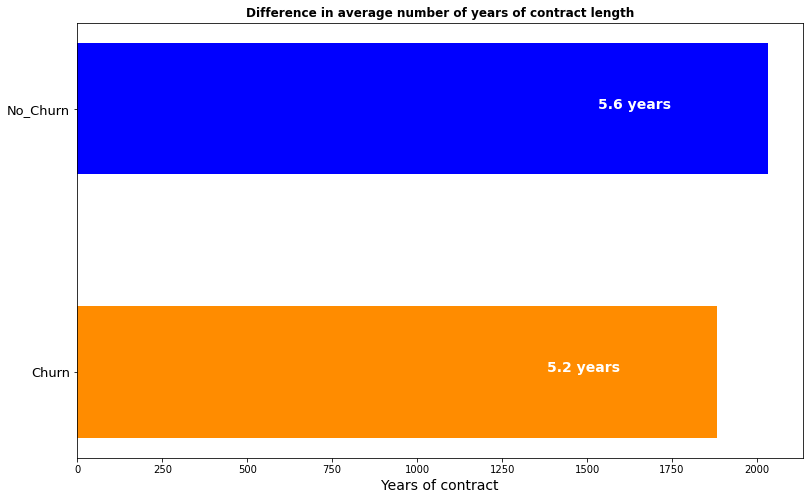

In [51]:
#CALCULATE THE MEAN NUMBER OF YEARS AS CUSTOMERS FOR THE 2 GROUPS, AND PLOT
TO_join_Churn = TO_join[(TO_join['Churning']==1)]
TO_join_NoChurn = TO_join[(TO_join['Churning']==0)]

ContractLength_Churn = TO_join_Churn['Contract_length_(days)'].mean()
ContractLength_NoChurn = TO_join_NoChurn['Contract_length_(days)'].mean()

fig = plt.figure(figsize=(13, 8)) 
a = ['Churn', 'No_Churn']
b = [ContractLength_Churn, ContractLength_NoChurn]
plt.barh(a, b, width, color=["darkorange","blue"])
plt.xlabel('Years of contract',fontsize=14)
plt.yticks(a,fontsize=13)
plt.title('Difference in average number of years of contract length',fontweight='bold')
for i, v in enumerate(b):
    plt.text(v-500, i, str(round(v/365,1))+' years', color='white', fontweight='bold',fontsize=14)

## Final cleaning and data preparation

In [52]:
THO_join.head(2)

,contract_id,Churning,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period,AVG_price_energy,AVG_price_power
0,6975aab29f35173b43eae4f595b747c7,0.0,1.328094,0.968983,1.104592,439.652769,221.001172,147.798618,1.133890,269.484186
1,8073016b742f47cf4c76cc41dc410122,1.0,1.619746,0.000000,0.000000,479.603318,0.000000,0.000000,0.539915,159.867773


In [53]:
cols = [1,2,3,4,5,6,7]
THO_join.drop(THO_join.columns[cols],axis=1,inplace=True)

In [54]:
THO_join.head(5)

,contract_id,AVG_price_energy,AVG_price_power
0,6975aab29f35173b43eae4f595b747c7,1.133890,269.484186
1,8073016b742f47cf4c76cc41dc410122,0.539915,159.867773
2,227c0e6b15256a1d3d3460e15c24ba60,1.387977,271.930898
3,e1ea0597bbad7bfd95adf1c7103bfda1,0.536597,160.188472
4,a2e017f297f2557a7b1cf4a92bc993e9,1.109814,269.484186


In [55]:
#MAKING THE NEW DATAFRAME ADDING ENERGY AND POWER PRICES TO THE TRAINING DATAFRAME
data = TO_join.merge(THO_join ,how='inner',left_on='contract_id',right_on='contract_id')

In [56]:
data.head(2)

,contract_id,Churning,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,...,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,Contract_length_(days),AVG_price_energy,AVG_price_power
0,6975aab29f35173b43eae4f595b747c7,0.0,12067.0,8723.0,303.0,2009-08-21,2016-08-21,2015-07-10,2015-08-22,NaN,...,30.223492,27.328471,3.0,37.220019,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,21.595285,2557.0,1.133890,269.484186
1,8073016b742f47cf4c76cc41dc410122,1.0,3183.0,0.0,406.0,2011-12-19,2016-12-19,2015-11-01,2015-12-21,NaN,...,38.276871,34.610440,1.0,17.946074,4.0,lxidpiddsbxsbosboudacockeimpuepw,15.648757,1827.0,0.539915,159.867773


In [57]:
#DELETING DATES COLUMNS AND OTHER UNUSABLE ONES
cols = [5,6,7,8,9]
data.drop(data.columns[cols],axis=1,inplace=True)
data.head(5)

,contract_id,Churning,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,...,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,Contract_length_(days),AVG_price_energy,AVG_price_power
0,6975aab29f35173b43eae4f595b747c7,0.0,12067.0,8723.0,303.0,NaN,NaN,NaN,395.464648,368.851331,...,30.223492,27.328471,3.0,37.220019,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,21.595285,2557.0,1.133890,269.484186
1,8073016b742f47cf4c76cc41dc410122,1.0,3183.0,0.0,406.0,NaN,NaN,NaN,228.789150,494.224444,...,38.276871,34.610440,1.0,17.946074,4.0,lxidpiddsbxsbosboudacockeimpuepw,15.648757,1827.0,0.539915,159.867773
2,227c0e6b15256a1d3d3460e15c24ba60,0.0,18464.0,26847.0,1534.0,NaN,NaN,NaN,1096.439754,1863.335174,...,73.755271,66.690466,3.0,57.147990,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,21.595285,2327.0,1.387977,271.930898
3,e1ea0597bbad7bfd95adf1c7103bfda1,0.0,17743.0,0.0,0.0,NaN,NaN,NaN,1270.888652,0.000000,...,42.023714,37.998383,1.0,105.174300,4.0,lxidpiddsbxsbosboudacockeimpuepw,16.462493,1461.0,0.536597,160.188472
4,a2e017f297f2557a7b1cf4a92bc993e9,0.0,42537.0,7606.0,3873.0,NaN,NaN,NaN,2006.504608,4703.308727,...,24.346702,22.014602,2.0,185.465888,4.0,lxidpiddsbxsbosboudacockeimpuepw,31.418949,1531.0,1.109814,269.484186


In [58]:
cols = [5,6,7]
data.drop(data.columns[cols],axis=1,inplace=True)
data.head(5)

,contract_id,Churning,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,...,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,code_elect_campaign_first_subs,subscribed_power,Contract_length_(days),AVG_price_energy,AVG_price_power
0,6975aab29f35173b43eae4f595b747c7,0.0,12067.0,8723.0,303.0,395.464648,368.851331,0.000000,92.644973,0.144509,...,30.223492,27.328471,3.0,37.220019,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,21.595285,2557.0,1.133890,269.484186
1,8073016b742f47cf4c76cc41dc410122,1.0,3183.0,0.0,406.0,228.789150,494.224444,0.000000,0.000000,0.181625,...,38.276871,34.610440,1.0,17.946074,4.0,lxidpiddsbxsbosboudacockeimpuepw,15.648757,1827.0,0.539915,159.867773
2,227c0e6b15256a1d3d3460e15c24ba60,0.0,18464.0,26847.0,1534.0,1096.439754,1863.335174,15.460479,90.524018,0.204192,...,73.755271,66.690466,3.0,57.147990,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,21.595285,2327.0,1.387977,271.930898
3,e1ea0597bbad7bfd95adf1c7103bfda1,0.0,17743.0,0.0,0.0,1270.888652,0.000000,0.000000,12.691187,0.181764,...,42.023714,37.998383,1.0,105.174300,4.0,lxidpiddsbxsbosboudacockeimpuepw,16.462493,1461.0,0.536597,160.188472
4,a2e017f297f2557a7b1cf4a92bc993e9,0.0,42537.0,7606.0,3873.0,2006.504608,4703.308727,0.000000,90.275306,0.142310,...,24.346702,22.014602,2.0,185.465888,4.0,lxidpiddsbxsbosboudacockeimpuepw,31.418949,1531.0,1.109814,269.484186


In [59]:
#DROPPING LAST NULL ROWS
data = data[data['fcst_current_discount'].notna()]
data = data[data['gross_margin_power_elect'].notna()]
data = data[data['total_net_margin'].notna()]
data = data[data['code_elect_campaign_first_subs'].notna()]

In [60]:
#Look at all columns with containing null values
data.loc[:, data.isna().any()]

""
0
1
2
3
4
...
16089
16090
16091
16092


In [61]:
#CONVERTING client_got_gas INTO 0s and 1s
data.loc[data.client_got_gas=='f','client_got_gas']=0
data.loc[data.client_got_gas=='t','client_got_gas']=1

data['client_got_gas']=data['client_got_gas'].astype(float)

In [62]:
data.dtypes

contract_id                         object
Churning                           float64
elect_cons_at_12m                  float64
gas_cons_at_12m                    float64
elect_cons_last_month              float64
fcst_consumption_elect_12m         float64
fcst_consumption_elect_cal_year    float64
fcst_current_discount              float64
fcst_bill_meter_rent_12m           float64
fcst_price_period_1                float64
fcst_price_period_2                float64
fcst_price_power_period_1          float64
client_got_gas                     float64
current_paid_consumption           float64
gross_margin_power_elect           float64
net_margin_power_elect             float64
number_active_products             float64
total_net_margin                   float64
customer_antiquity_in_years        float64
code_elect_campaign_first_subs      object
subscribed_power                   float64
Contract_length_(days)             float64
AVG_price_energy                   float64
AVG_price_p

In [63]:
data.code_elect_campaign_first_subs.unique()

array(['kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'lxidpiddsbxsbosboudacockeimpuepw',
       'ldkssxwpmemidmecebumciepifcamkci',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [64]:
#PERFORMING HOT ENCODING USING DUMMIES METHOD ON code_elect_campaign_first_subs
data = pd.get_dummies(data, columns=['code_elect_campaign_first_subs'],drop_first=True)
data.head(2)

,contract_id,Churning,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,...,total_net_margin,customer_antiquity_in_years,subscribed_power,Contract_length_(days),AVG_price_energy,AVG_price_power,code_elect_campaign_first_subs_kamkkxfxxuwbdslkwifmmcsiusiuosws,code_elect_campaign_first_subs_ldkssxwpmemidmecebumciepifcamkci,code_elect_campaign_first_subs_lxidpiddsbxsbosboudacockeimpuepw,code_elect_campaign_first_subs_usapbepcfoloekilkwsdiboslwaxobdp
0,6975aab29f35173b43eae4f595b747c7,0.0,12067.0,8723.0,303.0,395.464648,368.851331,0.0,92.644973,0.144509,...,37.220019,6.0,21.595285,2557.0,1.133890,269.484186,1,0,0,0
1,8073016b742f47cf4c76cc41dc410122,1.0,3183.0,0.0,406.0,228.789150,494.224444,0.0,0.000000,0.181625,...,17.946074,4.0,15.648757,1827.0,0.539915,159.867773,0,0,1,0


In [65]:
#EXPORT THE FINAL DATASET FOR MODELING
data.to_csv('TrainingData.csv', index=False)